### Pasos
1. Preprocesar data
    - Limpieza
    - Valores nulos / duplicados
    - agregacion
    - visualizacion
2. ML
    - Correlaciones
    - Crear modelo ML


nuestra variable objetivo es el: MSRP, siglas en inglés de "Manufacturer's Suggested Retail Price"

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt

In [2]:
df = pd.read_csv("/Users/klevizane/Documents/CienciaDatos/03_proyectos/02_car_predict price/data/car_data.csv")


##  Data Pre-processing


### Entender datos

- 552 datos nullos de invoice price
- 0 valores duplicados

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   index                 1610 non-null   int64 
 1   Make                  1610 non-null   object
 2   Model                 1610 non-null   object
 3   Year                  1610 non-null   int64 
 4   Trim                  1610 non-null   object
 5   MSRP                  1610 non-null   object
 6   Invoice Price         1058 non-null   object
 7   Used/New Price        1610 non-null   object
 8   Body Size             1610 non-null   object
 9   Body Style            1610 non-null   object
 10  Cylinders             1445 non-null   object
 11  Engine Aspiration     1610 non-null   object
 12  Drivetrain            1610 non-null   object
 13  Transmission          1610 non-null   object
 14  Horsepower            1605 non-null   object
 15  Torque                1583 non-null   

In [4]:
print(f"valores duplicados: {df.duplicated().sum()}")
print(f"\nValores nulos: {df.isnull().sum()}")
print(f"\ncolumnas del df: {df.columns}")
print(f"\nmarcas de coches: {df.Make.unique()}")

valores duplicados: 0

Valores nulos: index                     0
Make                      0
Model                     0
Year                      0
Trim                      0
MSRP                      0
Invoice Price           552
Used/New Price            0
Body Size                 0
Body Style                0
Cylinders               165
Engine Aspiration         0
Drivetrain                0
Transmission              0
Horsepower                5
Torque                   27
Highway Fuel Economy    424
dtype: int64

columnas del df: Index(['index', 'Make', 'Model', 'Year', 'Trim', 'MSRP', 'Invoice Price',
       'Used/New Price', 'Body Size', 'Body Style', 'Cylinders',
       'Engine Aspiration', 'Drivetrain', 'Transmission', 'Horsepower',
       'Torque', 'Highway Fuel Economy'],
      dtype='object')

marcas de coches: ['Aston Martin' 'Audi' 'BMW' 'Bentley' 'Ford' 'Mercedes-Benz' 'Nissan']


In [5]:
print(f"\n¿cuantos modelos de cada coche hay?: {df.Make.value_counts()}")


¿cuantos modelos de cada coche hay?: Make
Ford             626
Mercedes-Benz    262
Audi             252
Nissan           210
BMW              178
Bentley           73
Aston Martin       9
Name: count, dtype: int64


### Tratamiento de valores nulos

In [6]:
# Dado que tenemos en invoice price 552 valores nulos, vamos a eliminar esas columnas. Tambien eliminaremos Cylinders y Highway Fuel Economy
print(f"\nValores nulos: {df.isnull().sum()}")



Valores nulos: index                     0
Make                      0
Model                     0
Year                      0
Trim                      0
MSRP                      0
Invoice Price           552
Used/New Price            0
Body Size                 0
Body Style                0
Cylinders               165
Engine Aspiration         0
Drivetrain                0
Transmission              0
Horsepower                5
Torque                   27
Highway Fuel Economy    424
dtype: int64


In [7]:
df = df.drop(['Invoice Price', 'Cylinders','Highway Fuel Economy'], axis=1)
df

,index,Make,Model,Year,Trim,MSRP,Used/New Price,Body Size,Body Style,Engine Aspiration,Drivetrain,Transmission,Horsepower,Torque
0,0,Aston Martin,DBX707,2024,Base,"$242,000","$242,000",Large,SUV,Twin-Turbo,AWD,automatic,697 hp @ 6000 rpm,663 ft-lbs. @ 2750 rpm
1,1,Audi,A3,2024,Premium w/40 TFSI,"$35,800","$35,800",Compact,Sedan,Turbocharged,FWD,automatic,201 hp @ 4800 rpm,221 ft-lbs. @ 4100 rpm
2,2,Audi,A3,2024,Premium w/40 TFSI,"$37,800","$37,800",Compact,Sedan,Turbocharged,AWD,automatic,201 hp @ 5000 rpm,221 ft-lbs. @ 4000 rpm
3,3,Audi,A3,2024,Premium Plus w/40 TFSI,"$41,400","$41,400",Compact,Sedan,Turbocharged,AWD,automatic,201 hp @ 5000 rpm,221 ft-lbs. @ 4000 rpm
4,4,Audi,A3,2024,Premium Plus w/40 TFSI,"$39,400","$39,400",Compact,Sedan,Turbocharged,FWD,automatic,201 hp @ 4800 rpm,221 ft-lbs. @ 4100 rpm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,6410,Nissan,Z,2023,Performance,"$50,990","$50,990",Compact,Coupe,Twin-Turbo,RWD,automatic,400 hp @ 6400 rpm,350 ft-lbs. @ 1600 rpm
1606,6411,Nissan,Z,2023,Proto Spec,"$53,990","$53,990",Compact,Coupe,Twin-Turbo,RWD,automatic,400 hp @ 6400 rpm,350 ft-lbs. @ 1600 rpm
1607,6412,Nissan,Z,2023,Proto Spec,"$53,990","$53,990",Compact,Coupe,Twin-Turbo,RWD,manual,400 hp @ 6400 rpm,350 ft-lbs. @ 1600 rpm
1608,6413,Nissan,Z,2023,Sport,"$40,990","$40,990",Compact,Coupe,Twin-Turbo,RWD,manual,400 hp @ 6400 rpm,350 ft-lbs. @ 1600 rpm


In [8]:
# Vemos que la columna tiene horse power tiene datosd e los hp y rpm. a nosotros solo nos interesan los numeros. asi que crearemos 2 columnas para separar cada datos
# Creamosuna nueva columna y le decimo que es ugual a la columna horsepowe pero solo queremos las 3 primeres posicones que son tipo str y luego las convertimos a float
df["Horsepower_no"] = df["Horsepower"].str[0:3].astype(float)
df["Horsepower_no"].info()

# Vemos los valores nuloes de HP_NO
print(f"\nValores nulos de HP :{df.Horsepower_no.isnull().sum()}")

<class 'pandas.core.series.Series'>
RangeIndex: 1610 entries, 0 to 1609
Series name: Horsepower_no
Non-Null Count  Dtype  
--------------  -----  
1605 non-null   float64
dtypes: float64(1)
memory usage: 12.7 KB

Valores nulos de HP :5


In [9]:
# En vez de sustituir los valores nulos por la media, vamos a sustituirlos por la mediana de cada grupo de marcas asi sera mas exacto
median_hp_by_make = df.groupby('Make')['Horsepower_no'].transform("median")
df['Horsepower_no'] = df['Horsepower_no'].fillna(median_hp_by_make)
print("Valores nulos restantes en Horsepower:", df['Horsepower_no'].isnull().sum())

Valores nulos restantes en Horsepower: 0


In [10]:
# Lo mismo con la columna torque. Quedarme solo con los numeros y convertirlos a float.
df["Torque_no"] = df["Torque"].str[0:3].astype(float)
df["Torque_no"].info()
print(f"\nValores nulos de Torque :{df.Torque_no.isnull().sum()}")

<class 'pandas.core.series.Series'>
RangeIndex: 1610 entries, 0 to 1609
Series name: Torque_no
Non-Null Count  Dtype  
--------------  -----  
1583 non-null   float64
dtypes: float64(1)
memory usage: 12.7 KB

Valores nulos de Torque :27


In [11]:
# hacemos lo mismo que con horsepower. en vez de sustituir con la media de todos los valores. sustituimos con la mediana de cada grupo de marcas
median_torque_by_make = df.groupby('Make')['Torque_no'].transform("median")
df['Torque_no'] = df['Torque_no'].fillna(median_hp_by_make)
print("Valores nulos restantes en torque:", df['Torque_no'].isnull().sum())

Valores nulos restantes en torque: 0


### Clearing data types

In [12]:
df.head()

,index,Make,Model,Year,Trim,MSRP,Used/New Price,Body Size,Body Style,Engine Aspiration,Drivetrain,Transmission,Horsepower,Torque,Horsepower_no,Torque_no
0,0,Aston Martin,DBX707,2024,Base,"$242,000","$242,000",Large,SUV,Twin-Turbo,AWD,automatic,697 hp @ 6000 rpm,663 ft-lbs. @ 2750 rpm,697.0,663.0
1,1,Audi,A3,2024,Premium w/40 TFSI,"$35,800","$35,800",Compact,Sedan,Turbocharged,FWD,automatic,201 hp @ 4800 rpm,221 ft-lbs. @ 4100 rpm,201.0,221.0
2,2,Audi,A3,2024,Premium w/40 TFSI,"$37,800","$37,800",Compact,Sedan,Turbocharged,AWD,automatic,201 hp @ 5000 rpm,221 ft-lbs. @ 4000 rpm,201.0,221.0
3,3,Audi,A3,2024,Premium Plus w/40 TFSI,"$41,400","$41,400",Compact,Sedan,Turbocharged,AWD,automatic,201 hp @ 5000 rpm,221 ft-lbs. @ 4000 rpm,201.0,221.0
4,4,Audi,A3,2024,Premium Plus w/40 TFSI,"$39,400","$39,400",Compact,Sedan,Turbocharged,FWD,automatic,201 hp @ 4800 rpm,221 ft-lbs. @ 4100 rpm,201.0,221.0


In [13]:
# Vemos los tipos de datos
# Hay muchso datos que son object y deberian ser numericos. Como por ejemplo el MSRP Y USED/NEW PRICE,
df.dtypes

index                  int64
Make                  object
Model                 object
Year                   int64
Trim                  object
MSRP                  object
Used/New Price        object
Body Size             object
Body Style            object
Engine Aspiration     object
Drivetrain            object
Transmission          object
Horsepower            object
Torque                object
Horsepower_no        float64
Torque_no            float64
dtype: object

In [14]:
""" 
Hay dos maneras que se me ocurren de hacer eso.
1. Quitar los simbolos de dolar y las comas y convertir a float
2. Hacer un slice y quedarme solo con los numeros y convertir a float
Creo que la mejor opcion es la 1
"""

df["MSRP"] = df["MSRP"].str.replace('$', '').str.replace(',', '').astype(float)
df["Used/New Price"] = df["Used/New Price"].str.replace('$', '').str.replace(',', '').astype(float)

In [15]:
# Ya hemos arregaldo el problema que teniamos 
df.dtypes.iloc[5:7]

MSRP              float64
Used/New Price    float64
dtype: object

### Visualizar datos

MSRP tiene una corr de 1 con used/new price. creo que usar esa variable creara overfitting ya que esas columnas son practicamente lo mismo.

El torque tiene un 0.6 de corr con el precio del coche tambien loc caballos de pontencia tienen un 0.7 de corr con el precio del coche

In [16]:
# Creamos una nueva variable sin las columnas que no nos interesan las object
num_varaibles = df.select_dtypes(include=['int', "float"]).columns
print(f"\nVariables categoricas: {num_varaibles}")
matrix_corr = df[num_varaibles].corr()
matrix_corr


Variables categoricas: Index(['index', 'Year', 'MSRP', 'Used/New Price', 'Horsepower_no',
       'Torque_no'],
      dtype='object')


,index,Year,MSRP,Used/New Price,Horsepower_no,Torque_no
index,1.000000,-0.857793,-0.176511,-0.176511,-0.202280,-0.179327
Year,-0.857793,1.000000,0.073089,0.073089,0.078333,0.071379
MSRP,-0.176511,0.073089,1.000000,1.000000,0.703127,0.621411
Used/New Price,-0.176511,0.073089,1.000000,1.000000,0.703127,0.621411
Horsepower_no,-0.202280,0.078333,0.703127,0.703127,1.000000,0.788235
Torque_no,-0.179327,0.071379,0.621411,0.621411,0.788235,1.000000


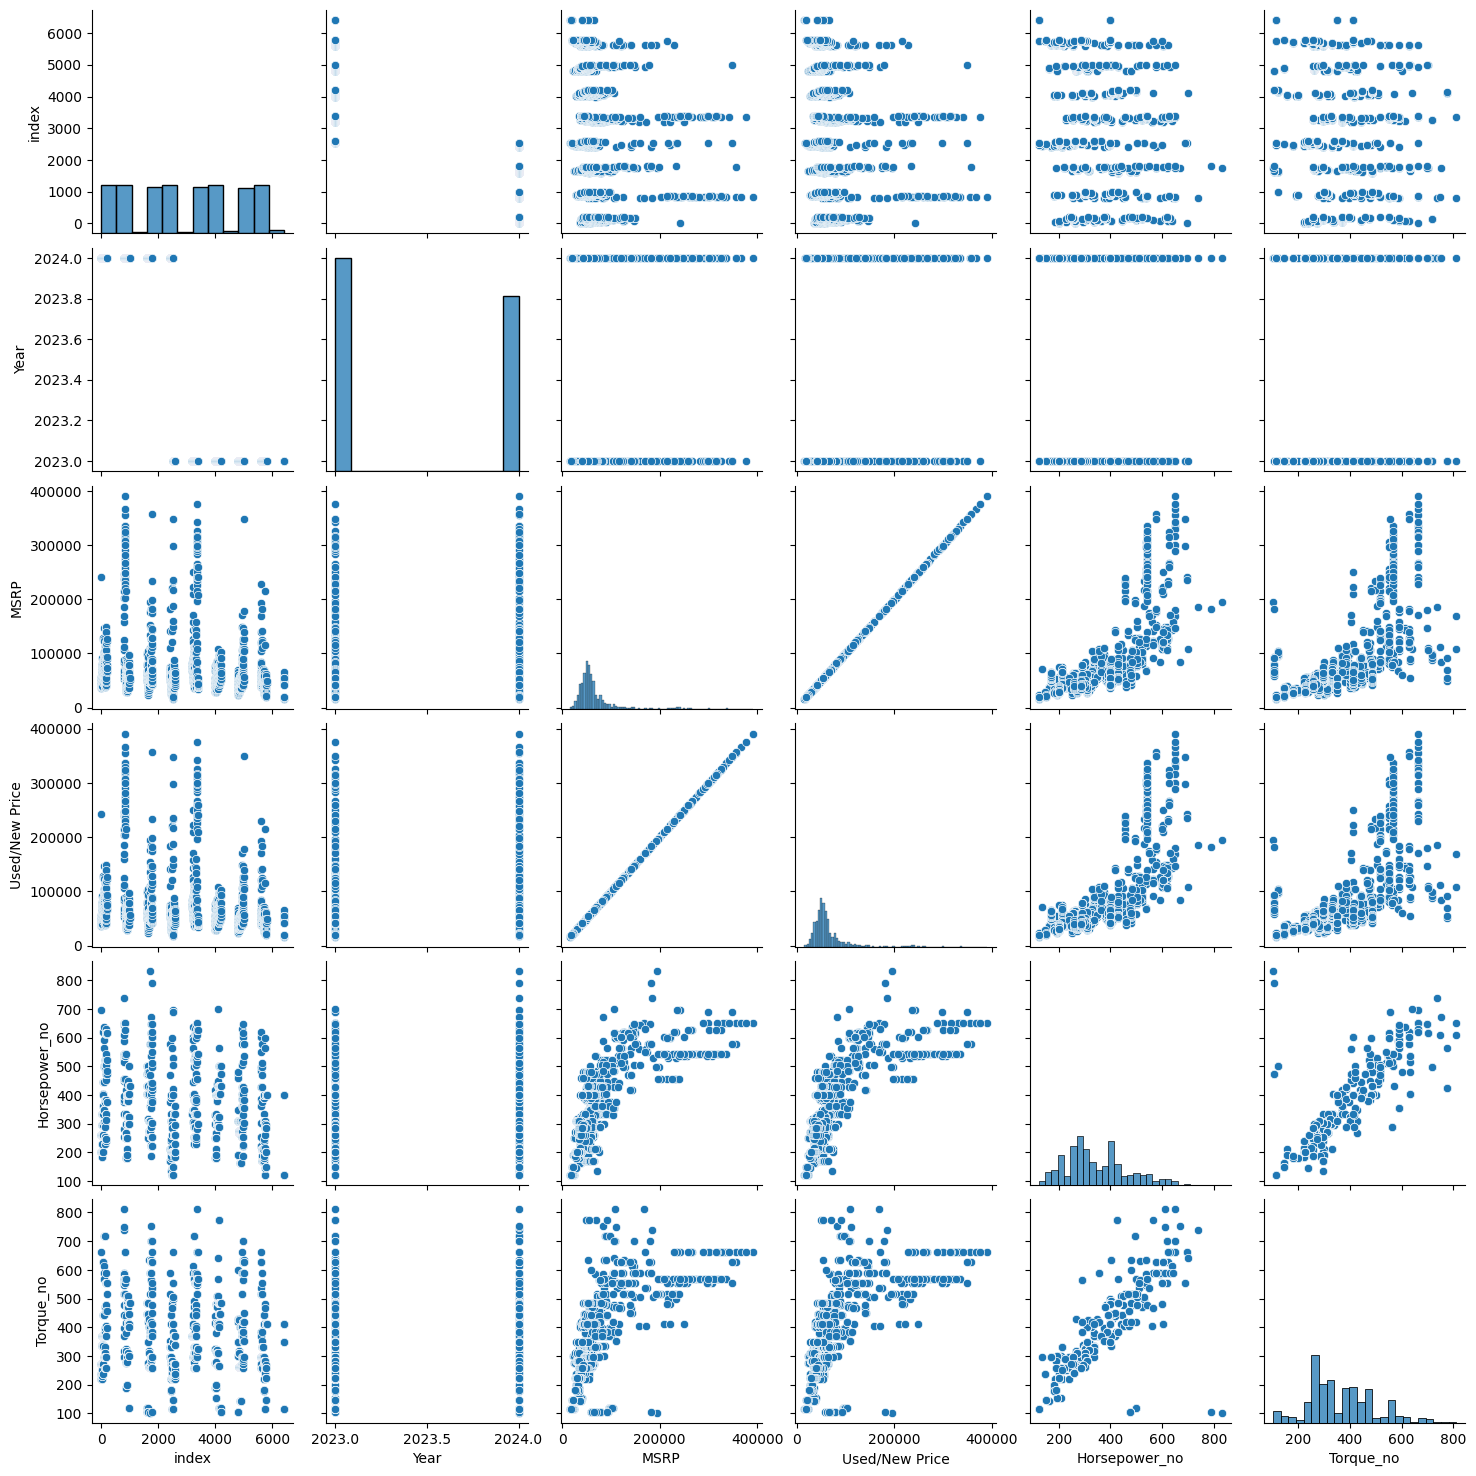

In [17]:
# Example 1 - Visualize the data using seaborn Pairplots
g = sns.pairplot(df)

# Vamos a usar la regresion lineal multiple para predecir el precio de un coche
# Primero vamos a ver las correlaciones entre las variables



'\nvale vemos que lso twin-turbo tienen un precio mas alto que los otros tipos de aspiracion. seria un valor atipico \n\n'

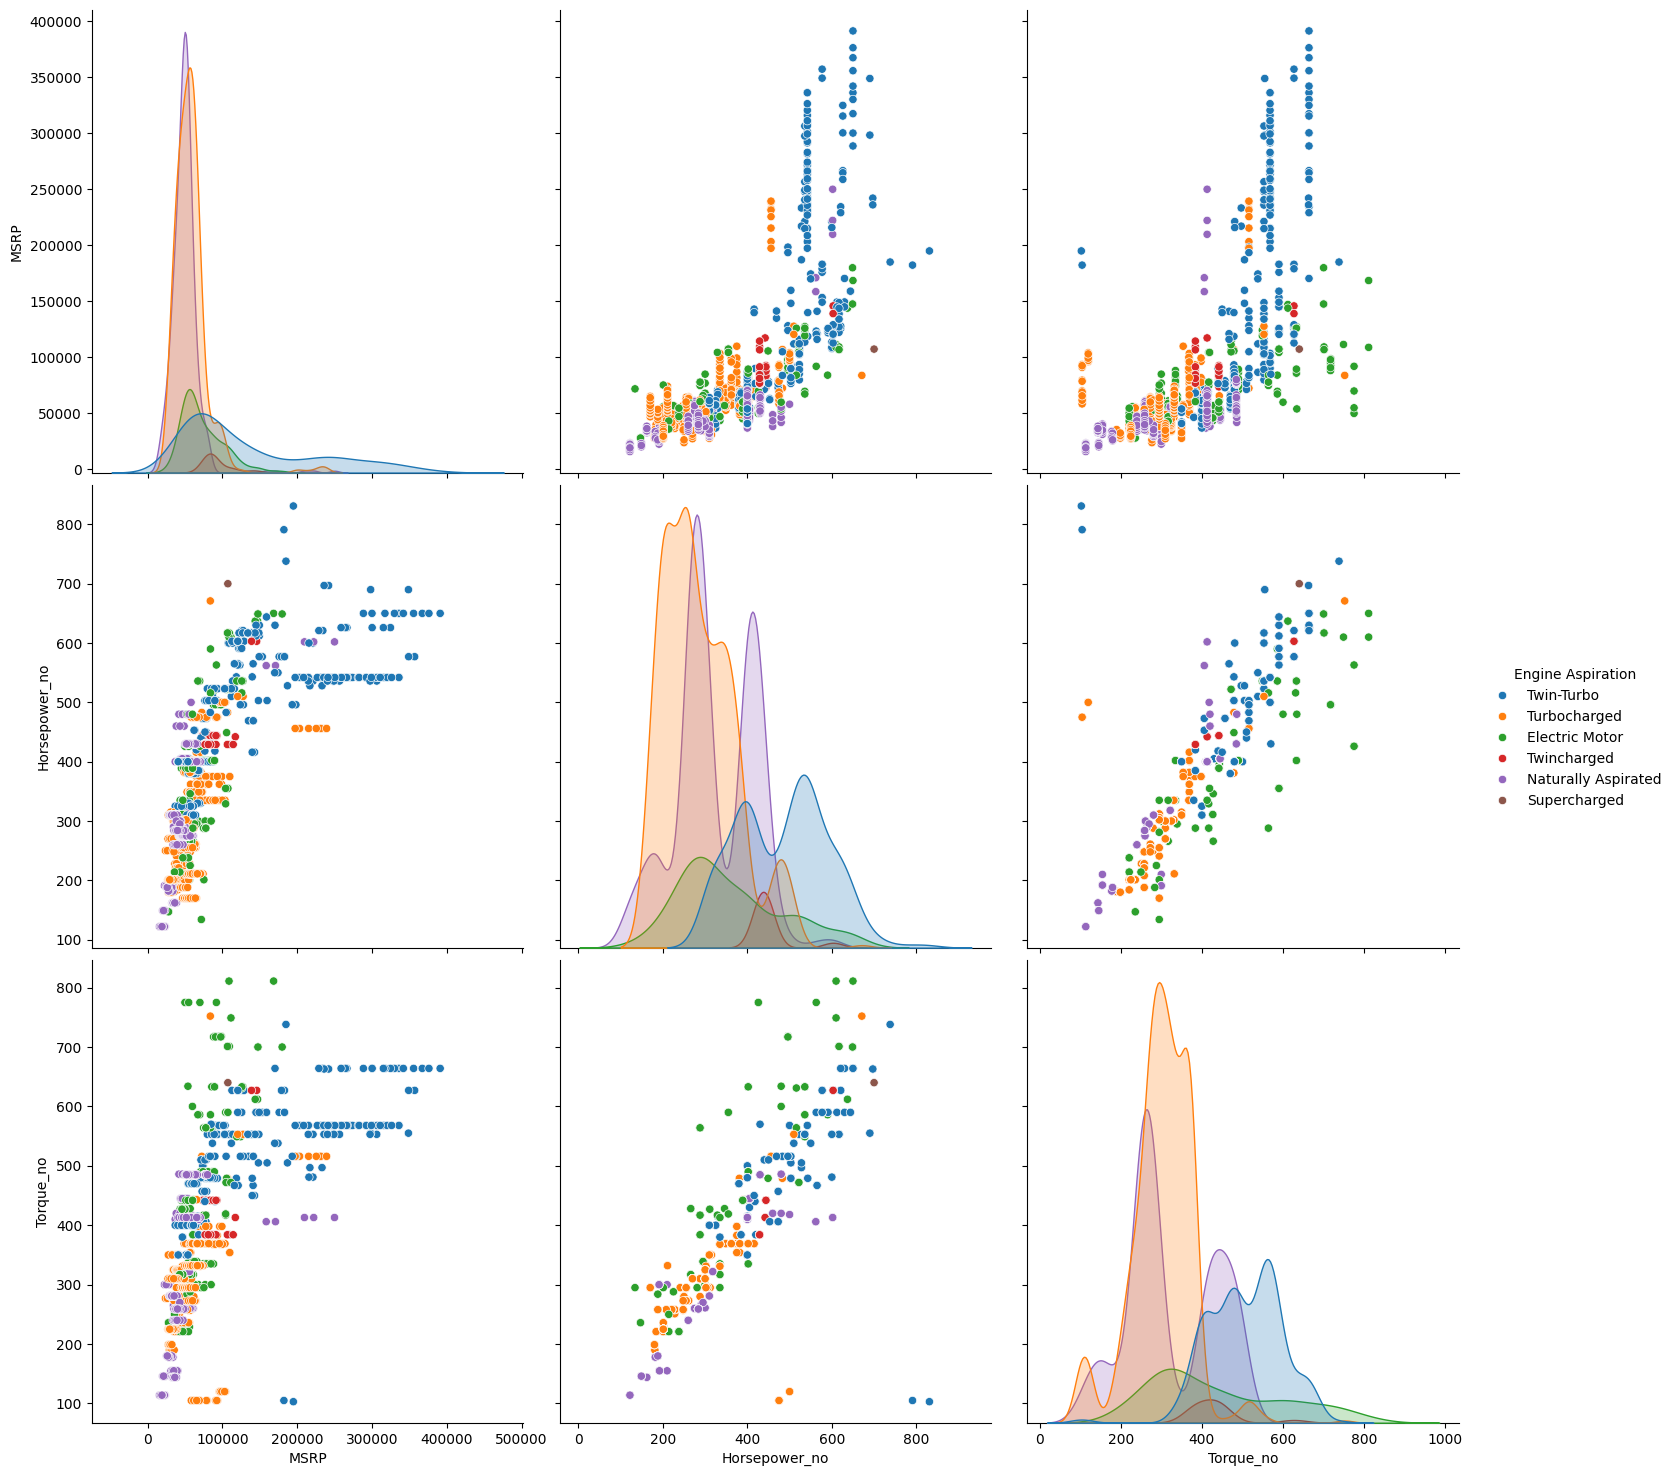

In [18]:
g = sns.pairplot(df[['MSRP', 'Horsepower_no', 'Torque_no', 'Engine Aspiration']], hue = 'Engine Aspiration', height = 5)
"""
vale vemos que lso twin-turbo tienen un precio mas alto que los otros tipos de aspiracion. seria un valor atipico 

"""


'\nVemos tambien que las marcas del coche tambein influyen en el precio del coche\nlos mas caros y que no siguen una linea recta son principalmente : aston matrin, bentley\n'

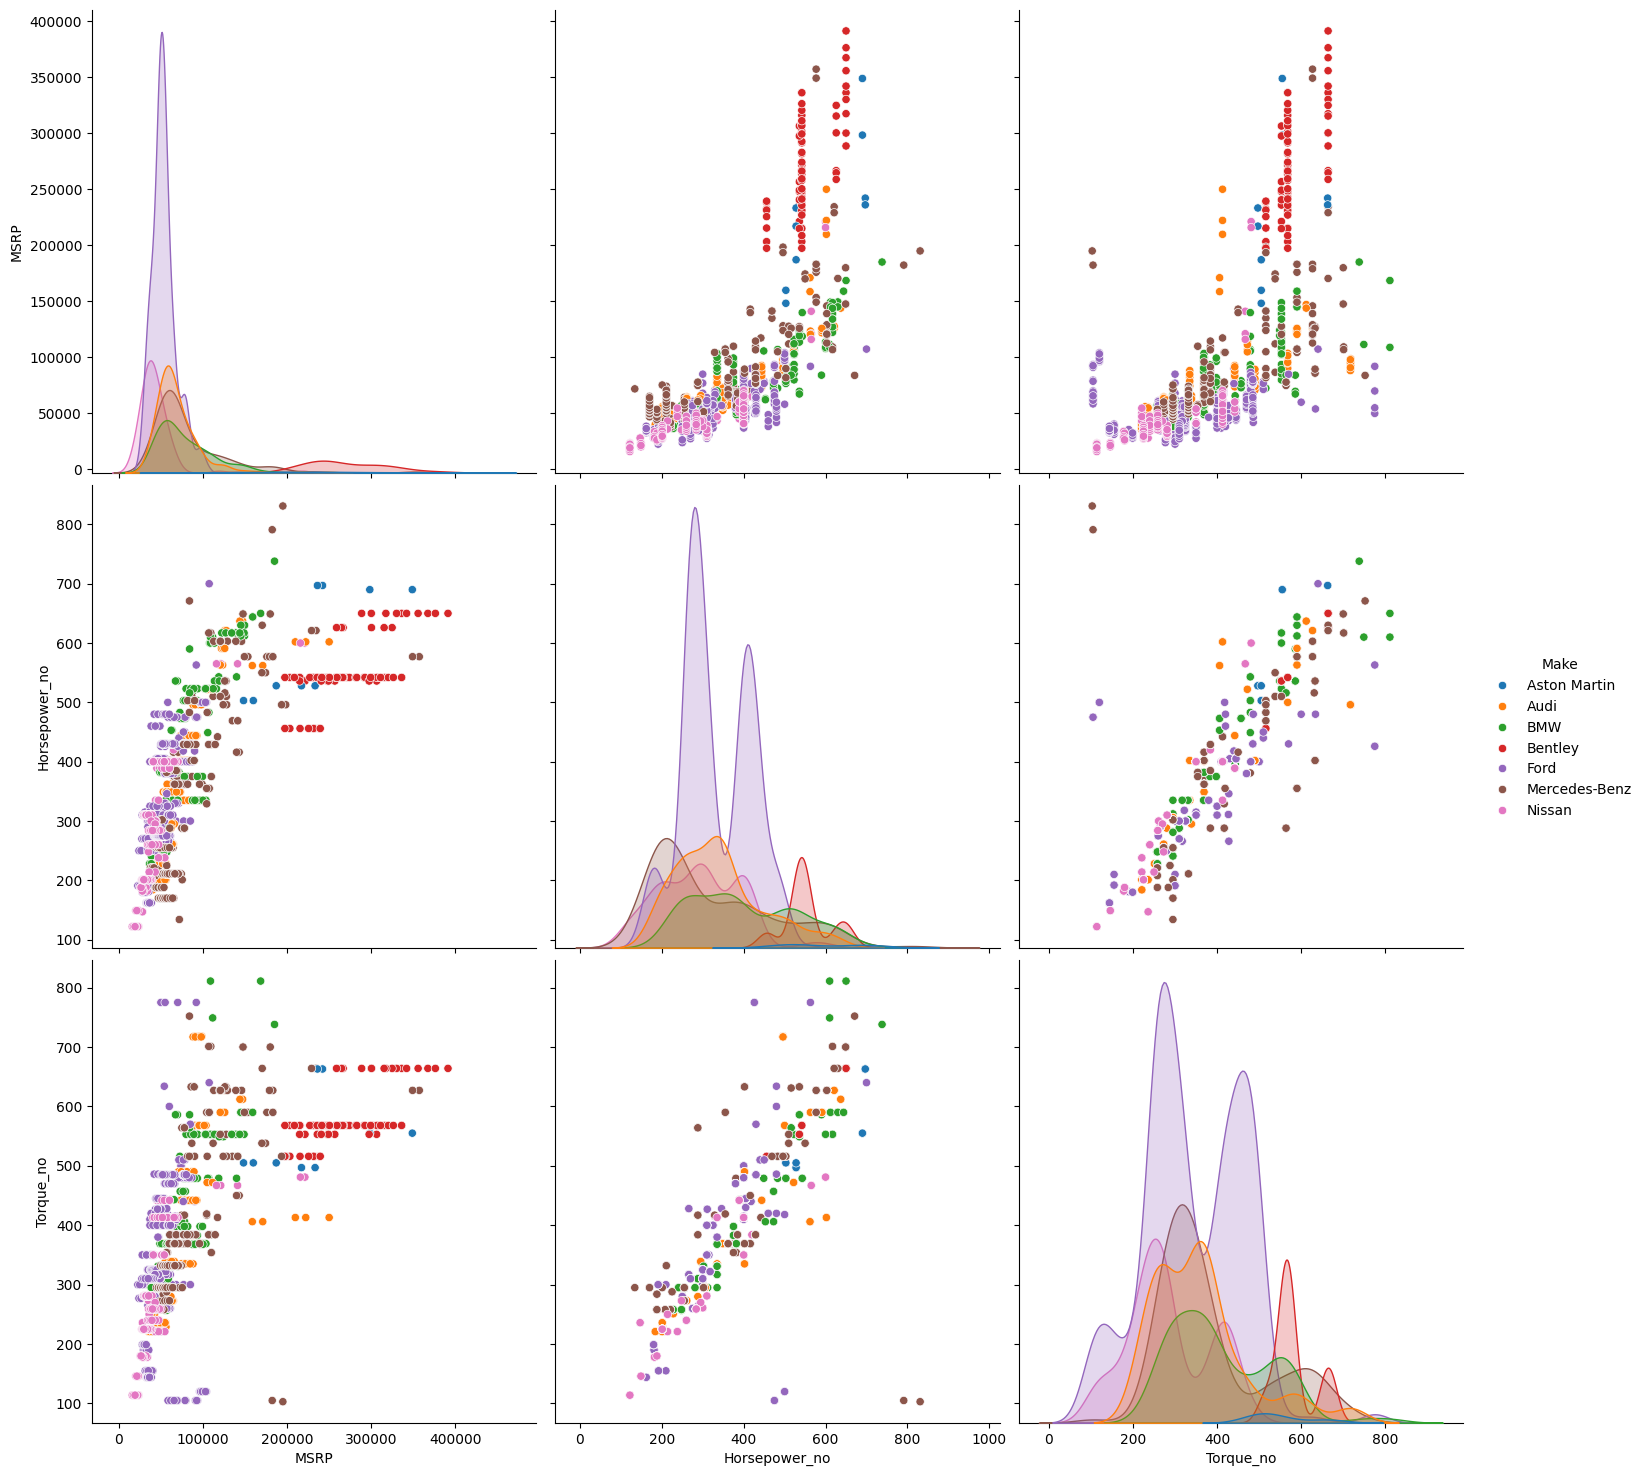

In [19]:
g = sns.pairplot(df[['MSRP', 'Horsepower_no', 'Torque_no', 'Make']], hue = 'Make', height = 5) #, kind="reg")
"""
Vemos tambien que las marcas del coche tambein influyen en el precio del coche
los mas caros y que no siguen una linea recta son principalmente : aston matrin, bentley
"""


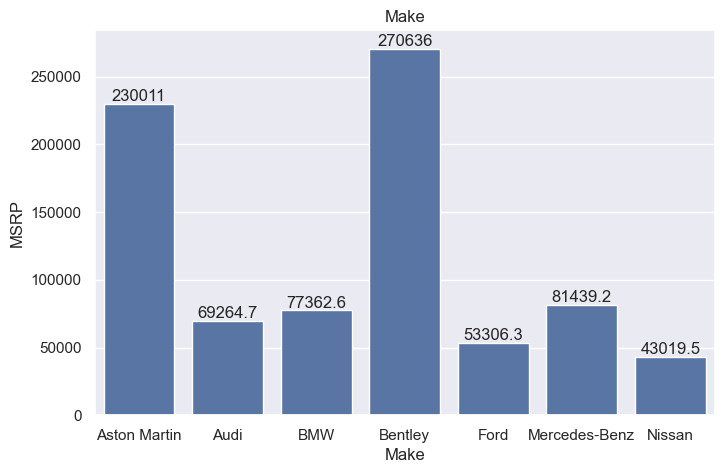

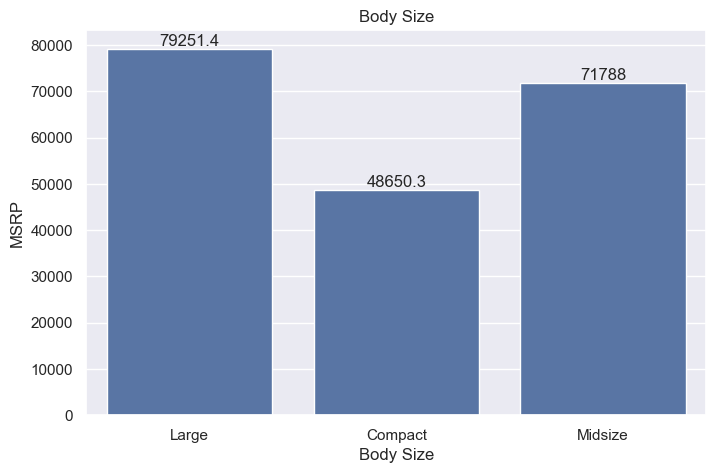

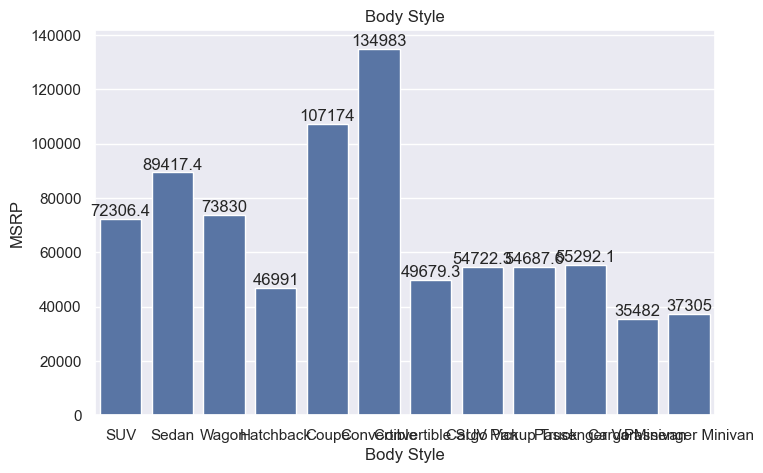

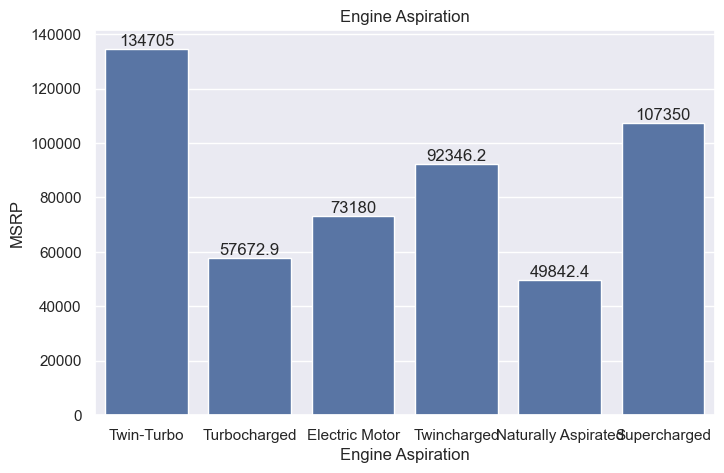

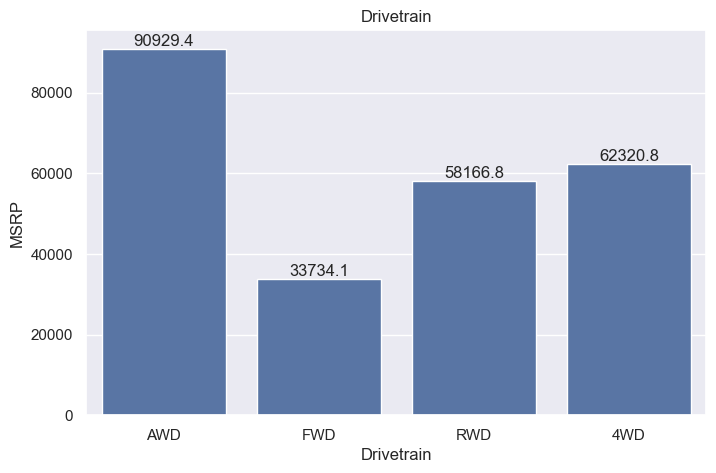

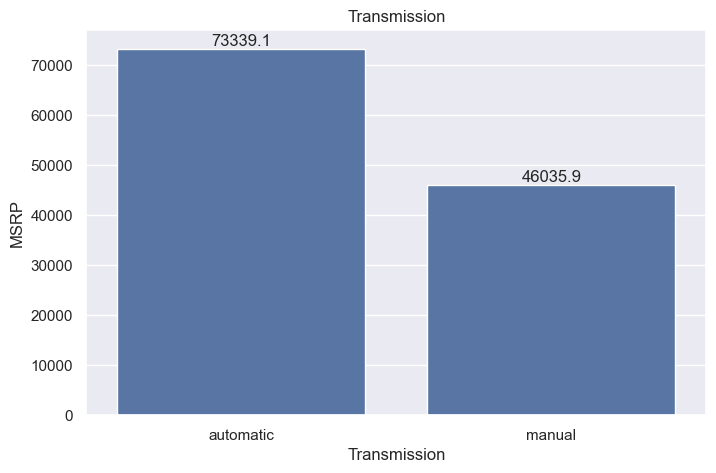

In [20]:
# visualizing the categorical values
"""
Conclusiones de los datos:
bentley y aston mastrin son los coches mas caros
los coches con un body size mas grande son mas caros
los coches twin-turbo son mas caros
los que tienen awd y transmicion 
"""

categories = ['Make','Body Size','Body Style', 'Engine Aspiration', 'Drivetrain','Transmission']

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,5)})

for c in categories:
    
    ax = sns.barplot(x=c, y="MSRP", data=df, errorbar=('ci', False)) #, hue = 'Model')
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(c)
    plt.show()

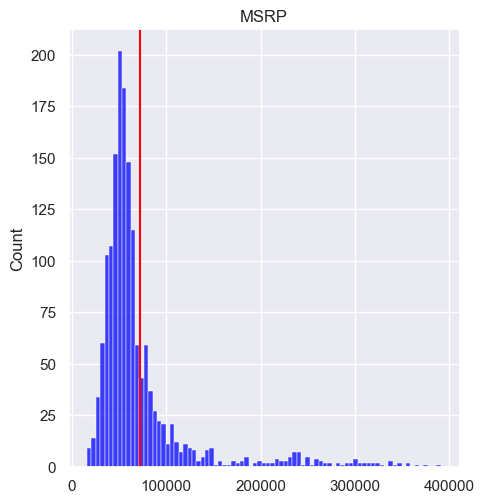

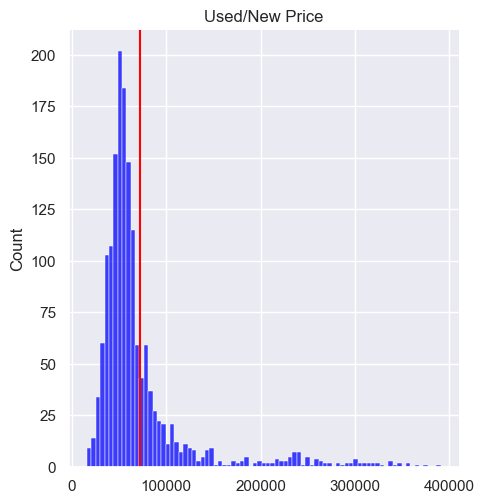

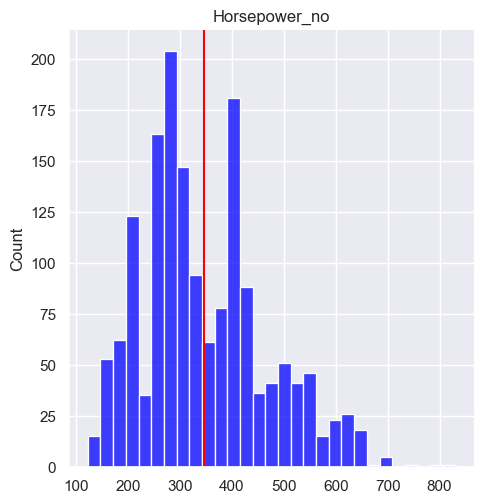

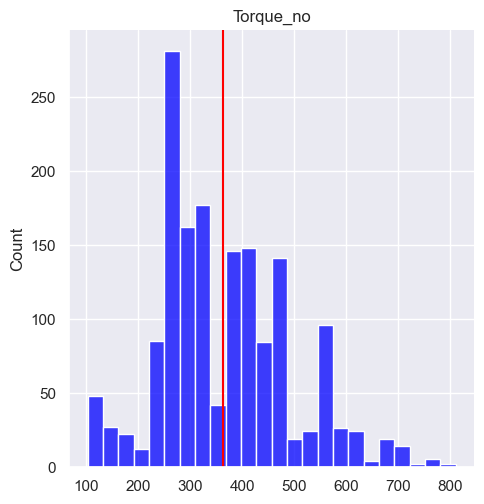

In [21]:
n_variables = ['MSRP','Used/New Price','Horsepower_no','Torque_no']

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,5)})

for n in n_variables:
    x = df[n].values
    sns.displot(x, color = 'blue');

    # Calculating the mean
    mean = df[n].mean()

    #ploting the mean
    plt.axvline(mean, 0,1, color = 'red')
    plt.title(n)
    plt.show()

    # En el primer histograma vemos que el precio de los coches no sigue una distribucion normal. hay outleyers en la parte derecha
    # Lo mismo pasa con el segundo histograma

The meadian is:  55945.0


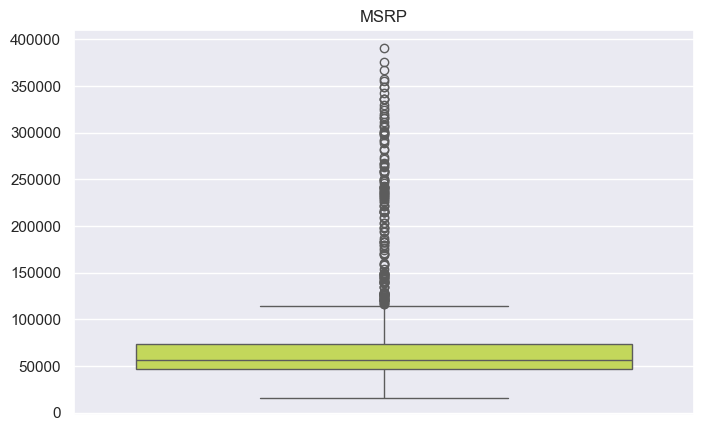

The meadian is:  55945.0


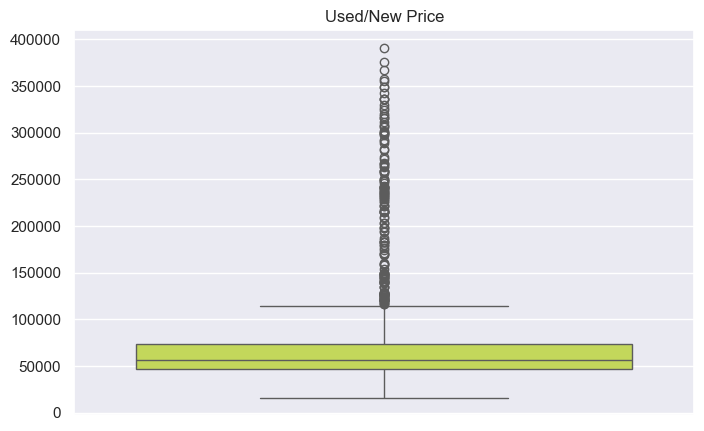

The meadian is:  318.0


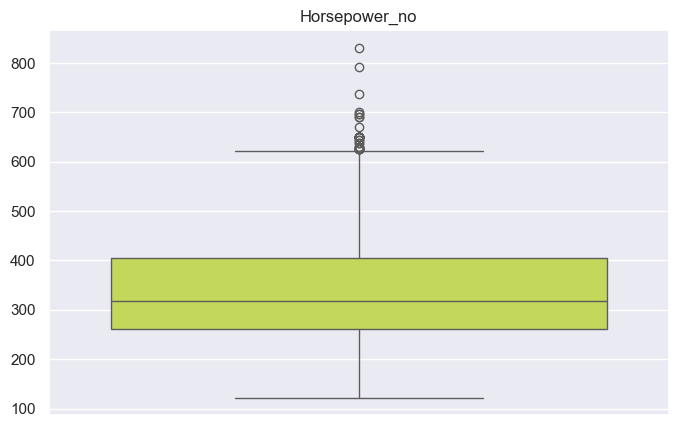

The meadian is:  335.0


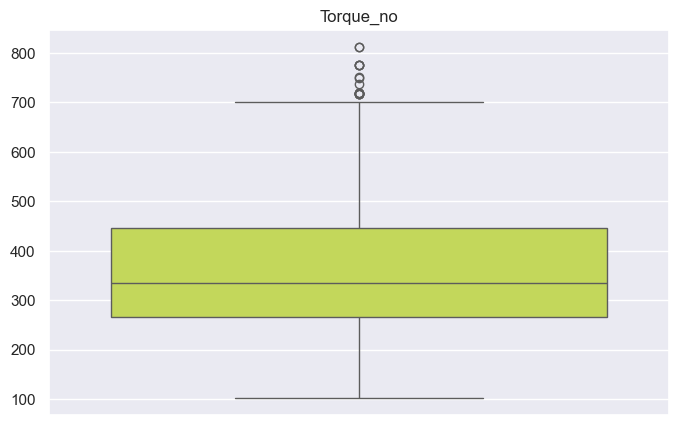

In [22]:
# Investigating the distribution of all Numerical values

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,5)})

for c in n_variables:    
    x = df[c].values
    ax = sns.boxplot(x, color = '#D1EC46')
    print('The meadian is: ', df[c].median())
    plt.title(c)
    plt.show()

# Lo mismo vemos tb outlayers en los boxplots. Debe ser por los oches de alta gama como bentley y aston martin que son muy caros

## Preparar df

In [23]:
df

,index,Make,Model,Year,Trim,MSRP,Used/New Price,Body Size,Body Style,Engine Aspiration,Drivetrain,Transmission,Horsepower,Torque,Horsepower_no,Torque_no
0,0,Aston Martin,DBX707,2024,Base,242000.0,242000.0,Large,SUV,Twin-Turbo,AWD,automatic,697 hp @ 6000 rpm,663 ft-lbs. @ 2750 rpm,697.0,663.0
1,1,Audi,A3,2024,Premium w/40 TFSI,35800.0,35800.0,Compact,Sedan,Turbocharged,FWD,automatic,201 hp @ 4800 rpm,221 ft-lbs. @ 4100 rpm,201.0,221.0
2,2,Audi,A3,2024,Premium w/40 TFSI,37800.0,37800.0,Compact,Sedan,Turbocharged,AWD,automatic,201 hp @ 5000 rpm,221 ft-lbs. @ 4000 rpm,201.0,221.0
3,3,Audi,A3,2024,Premium Plus w/40 TFSI,41400.0,41400.0,Compact,Sedan,Turbocharged,AWD,automatic,201 hp @ 5000 rpm,221 ft-lbs. @ 4000 rpm,201.0,221.0
4,4,Audi,A3,2024,Premium Plus w/40 TFSI,39400.0,39400.0,Compact,Sedan,Turbocharged,FWD,automatic,201 hp @ 4800 rpm,221 ft-lbs. @ 4100 rpm,201.0,221.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,6410,Nissan,Z,2023,Performance,50990.0,50990.0,Compact,Coupe,Twin-Turbo,RWD,automatic,400 hp @ 6400 rpm,350 ft-lbs. @ 1600 rpm,400.0,350.0
1606,6411,Nissan,Z,2023,Proto Spec,53990.0,53990.0,Compact,Coupe,Twin-Turbo,RWD,automatic,400 hp @ 6400 rpm,350 ft-lbs. @ 1600 rpm,400.0,350.0
1607,6412,Nissan,Z,2023,Proto Spec,53990.0,53990.0,Compact,Coupe,Twin-Turbo,RWD,manual,400 hp @ 6400 rpm,350 ft-lbs. @ 1600 rpm,400.0,350.0
1608,6413,Nissan,Z,2023,Sport,40990.0,40990.0,Compact,Coupe,Twin-Turbo,RWD,manual,400 hp @ 6400 rpm,350 ft-lbs. @ 1600 rpm,400.0,350.0


In [24]:
# Eliminando columnas queno necesitamos
df = df.drop(['index', "Model", 'Year', 'Trim', 'Used/New Price', 'Horsepower', 'Torque'], axis=1)

df.head()


,Make,MSRP,Body Size,Body Style,Engine Aspiration,Drivetrain,Transmission,Horsepower_no,Torque_no
0,Aston Martin,242000.0,Large,SUV,Twin-Turbo,AWD,automatic,697.0,663.0
1,Audi,35800.0,Compact,Sedan,Turbocharged,FWD,automatic,201.0,221.0
2,Audi,37800.0,Compact,Sedan,Turbocharged,AWD,automatic,201.0,221.0
3,Audi,41400.0,Compact,Sedan,Turbocharged,AWD,automatic,201.0,221.0
4,Audi,39400.0,Compact,Sedan,Turbocharged,FWD,automatic,201.0,221.0


In [25]:
# Creando dummies
# Making categorical variables into numeric representation
df = pd.get_dummies(df, columns = ['Make','Body Size','Body Style', 'Engine Aspiration', 'Drivetrain','Transmission'])
df

,MSRP,Horsepower_no,Torque_no,Make_Aston Martin,Make_Audi,Make_BMW,Make_Bentley,Make_Ford,Make_Mercedes-Benz,Make_Nissan,...,Engine Aspiration_Supercharged,Engine Aspiration_Turbocharged,Engine Aspiration_Twin-Turbo,Engine Aspiration_Twincharged,Drivetrain_4WD,Drivetrain_AWD,Drivetrain_FWD,Drivetrain_RWD,Transmission_automatic,Transmission_manual
0,242000.0,697.0,663.0,True,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,True,False
1,35800.0,201.0,221.0,False,True,False,False,False,False,False,...,False,True,False,False,False,False,True,False,True,False
2,37800.0,201.0,221.0,False,True,False,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False
3,41400.0,201.0,221.0,False,True,False,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False
4,39400.0,201.0,221.0,False,True,False,False,False,False,False,...,False,True,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,50990.0,400.0,350.0,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,True,True,False
1606,53990.0,400.0,350.0,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,True,True,False
1607,53990.0,400.0,350.0,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,True,False,True
1608,40990.0,400.0,350.0,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,True,False,True


### Correlacion e importancia de features

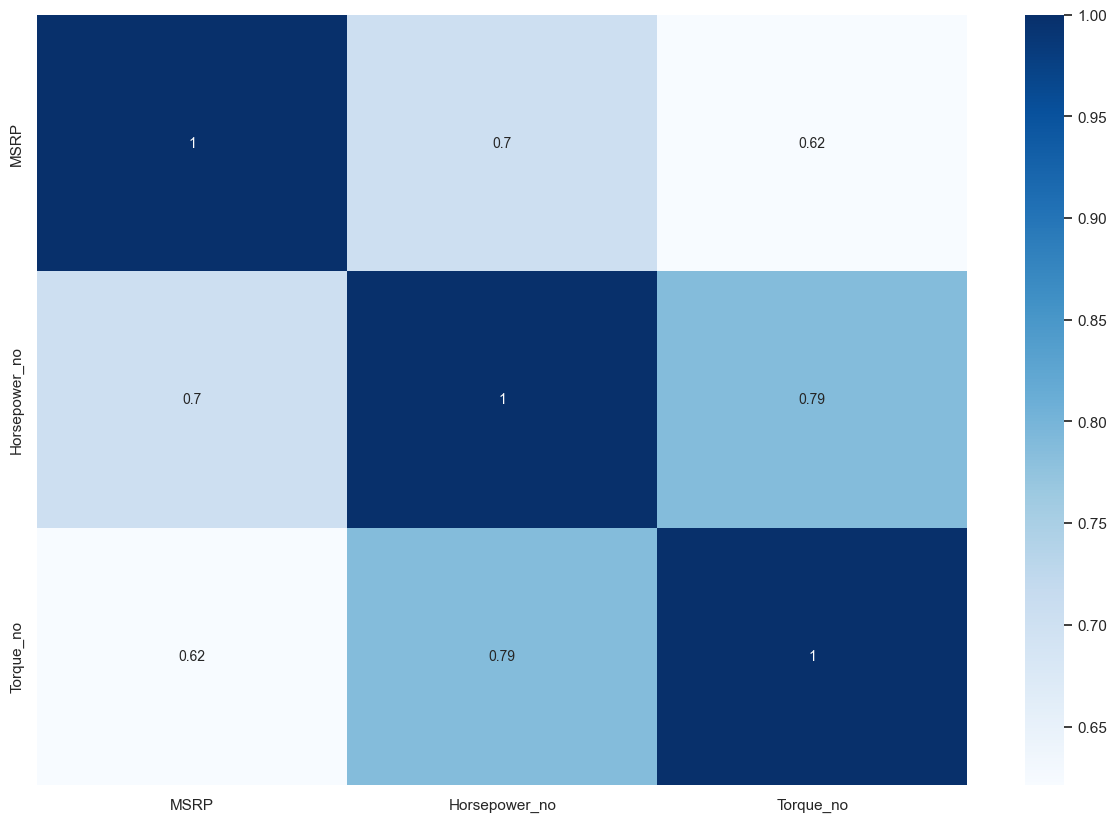

In [26]:
sns.set(rc={'figure.figsize':(15,10)})

n_variables = ['MSRP','Horsepower_no','Torque_no']

pc = df[n_variables].corr(method ='pearson')

cols = n_variables

ax = sns.heatmap(pc, annot=True,
                 yticklabels=cols,
                 xticklabels=cols,
                 annot_kws={'size':10},
                 cmap="Blues")

# Como dijimos antes las variabls que mas correlacion tienen con el precio son el horsepower y el torque.

## Split data

In [27]:
X = df.drop('MSRP', axis=1)

In [28]:
y = df['MSRP'].astype(int)

In [29]:
print(X.shape)
print(y.shape)

(1610, 36)
(1610,)


In [30]:
# Hold-out validation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size = 0.2, random_state=33)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1288, 36)
(322, 36)
(1288,)
(322,)


In [31]:
df

,MSRP,Horsepower_no,Torque_no,Make_Aston Martin,Make_Audi,Make_BMW,Make_Bentley,Make_Ford,Make_Mercedes-Benz,Make_Nissan,...,Engine Aspiration_Supercharged,Engine Aspiration_Turbocharged,Engine Aspiration_Twin-Turbo,Engine Aspiration_Twincharged,Drivetrain_4WD,Drivetrain_AWD,Drivetrain_FWD,Drivetrain_RWD,Transmission_automatic,Transmission_manual
0,242000.0,697.0,663.0,True,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,True,False
1,35800.0,201.0,221.0,False,True,False,False,False,False,False,...,False,True,False,False,False,False,True,False,True,False
2,37800.0,201.0,221.0,False,True,False,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False
3,41400.0,201.0,221.0,False,True,False,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False
4,39400.0,201.0,221.0,False,True,False,False,False,False,False,...,False,True,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,50990.0,400.0,350.0,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,True,True,False
1606,53990.0,400.0,350.0,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,True,True,False
1607,53990.0,400.0,350.0,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,True,False,True
1608,40990.0,400.0,350.0,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,True,False,True


## Modelo de regresion

In [32]:
# Training the Regression
lr = LinearRegression(fit_intercept = True)
lr.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [33]:
y_pred = lr.predict(X_train)
all_df_predict = lr.predict(X)

In [34]:
# Model Accuracy on training dataset
print('The Accuracy  on the training dataset is: ', lr.score(X_train, y_train) )
print('The Accuracy r2  on the training dataset prediction is: ',r2_score(y_train,y_pred) )   
print("")
# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', lr.score(X_test, y_test) )

print("")
# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,lr.predict(X_test))))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,lr.predict(X_test)))


print("")
# Coefficients
print('Coefficients: ', lr.coef_ )

print("")
# The Intercept
print('Intercept: ', lr.intercept_)


The Accuracy  on the training dataset is:  0.9023067053646255
The Accuracy r2  on the training dataset prediction is:  0.9023067053646255

The Accuracy  on the testing dataset is:  0.8910329523325293

The RMSE  on the training dataset is:  17405.94497284494
The RMSE  on the testing dataset is:  17017.993894966825

The MAE  on the training dataset is:  10761.062277078467
The MAE  on the testing dataset is:  11383.666094289822

Coefficients:  [ 2.33809585e+02 -1.92527949e+01  7.27289700e+04 -3.24795376e+04
 -4.10664229e+04  1.17142983e+05 -4.75393616e+04 -1.99672585e+04
 -4.88193728e+04  1.47119379e+03 -8.42860458e+02 -6.28333333e+02
  2.49142836e+03  8.70435085e+03  1.46511130e+04  9.16744920e+02
 -1.84815857e+02 -3.19790698e+03  2.24699685e+03  9.11297490e+03
 -1.85385491e+04 -5.23406223e+03 -3.27721964e+03 -7.69105508e+03
  6.93608762e+03  2.97519005e+03 -1.54517597e+04  1.41245230e+03
  1.07939497e+04 -6.66591997e+03  4.50266677e+03 -3.56029512e+03
  5.12435861e+03 -6.06673025e+03  1

## Storing model

In [35]:
"""import joblib
joblib.dump(lr, "modelo_lr.pkl")"""

'import joblib\njoblib.dump(lr, "modelo_lr.pkl")'

In [36]:
from sklearn.model_selection import cross_val_score


In [37]:
cvscore = cross_val_score(lr, X, y.values.ravel(), cv=20)

In [38]:
import numpy as np
print(f"\n{np.average(cvscore)}")
print(f"\n {np.std(cvscore)}")


0.6212709057599037

 0.3275979741078673
